In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
companies = pd.read_csv('../data/graph/companies_ndata.csv',
                        dtype={'INN': str,
                               'KPP': str,
                               'okved_code': str})
fin_cols = [c for c in companies.columns if c.startswith('Ф')]
fin_data = companies[fin_cols]
nonfin_data = companies[[c for c in companies.columns 
                             if c not in fin_cols]]

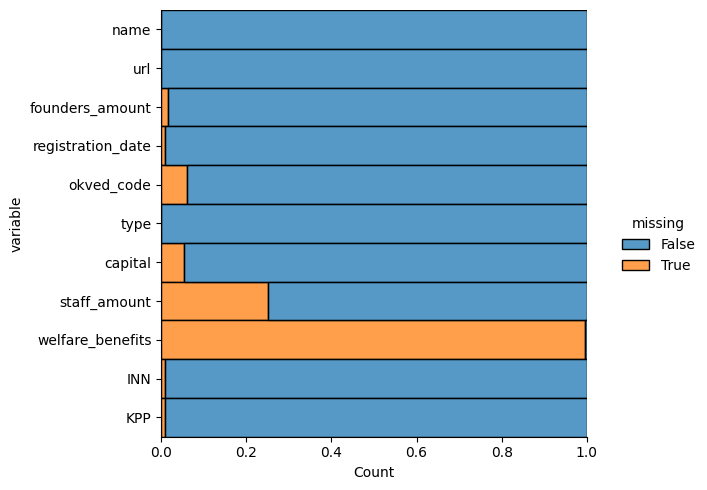

In [3]:
sns.displot(
    data=nonfin_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig('../imgs/missing_nonfin.png', dpi=100)

In [4]:
nonfin_data.describe()

,founders_amount,capital,staff_amount,welfare_benefits
count,33392.000000,3.205700e+04,25390.000000,1.190000e+02
mean,8.247275,7.296206e+07,55.657424,1.546856e+05
std,73.505744,2.529770e+09,475.318489,8.092940e+05
min,1.000000,1.000000e+00,1.000000,1.200000e+01
25%,1.000000,1.000000e+04,1.000000,4.748585e+02
50%,1.000000,1.000000e+04,2.000000,2.404530e+03
75%,2.000000,3.958000e+04,10.000000,1.067181e+04
max,5455.000000,2.903030e+11,38864.000000,6.480670e+06


In [5]:
nonfin_data.loc[nonfin_data['staff_amount'].nlargest(10).index]

,name,url,founders_amount,registration_date,okved_code,type,capital,staff_amount,welfare_benefits,INN,KPP
33430,"ПАО ""НЛМК"" (ОКПО:05757665).",company/1221,998.0,09.07.2002,NaN,company,5.993230e+09,38864.0,332455.0,4823006703,482301001
28660,"АО ""ПО ""СЕВМАШ""",company/1657,1.0,01.06.2008,30.11,company,1.789300e+10,26134.0,NaN,2902059091,290201001
33679,"ПАО ""ГАЗПРОМ"" (ОКПО:00040778).",company/456,1699.0,02.08.2002,NaN,company,1.183680e+11,21277.0,6480670.0,7736050003,781401001
21491,"ОАО ""МРСК УРАЛА""",company/428301,998.0,28.02.2005,35.12,company,8.743050e+09,14300.0,107964.0,6671163413,668501001
30296,"АО ""АПАТИТ""",company/126,1.0,31.07.2002,20.15,company,2.280650e+06,14055.0,NaN,5103070023,352801001
3013,"АО ""СУЭК-КУЗБАСС""",company/4562899,2.0,07.05.2007,05.10.16,company,7.773650e+09,11569.0,NaN,4212024138,421201001
7696,"АО ""ВБД"" (ОКПО:05268977).",company/959,2.0,14.12.2002,NaN,company,4.331860e+06,11482.0,NaN,7713085659,771301001
3270,"АО ""Лебединский ГОК""",company/939,1.0,23.09.2002,07.10.2,company,9.349350e+05,9459.0,NaN,3127000014,312701001
22175,"ГУП ""ТЭК СПБ""",company/12227,2.0,11.12.2002,35.30.14,company,7.491520e+09,9105.0,NaN,7830001028,783801001
33516,"ООО ""Газпром трансгаз Чайковский"" (ОКПО:048011...",company/4054,1.0,10.09.2002,NaN,company,3.219200e+09,8364.0,NaN,5920000593,592001001


In [6]:
missings = fin_data.isna().sum()
missings.describe()

count      148.000000
mean     22820.283784
std      13271.889827
min       6722.000000
25%       6742.750000
50%      33793.000000
75%      33793.000000
max      33889.000000
dtype: float64

([], [])

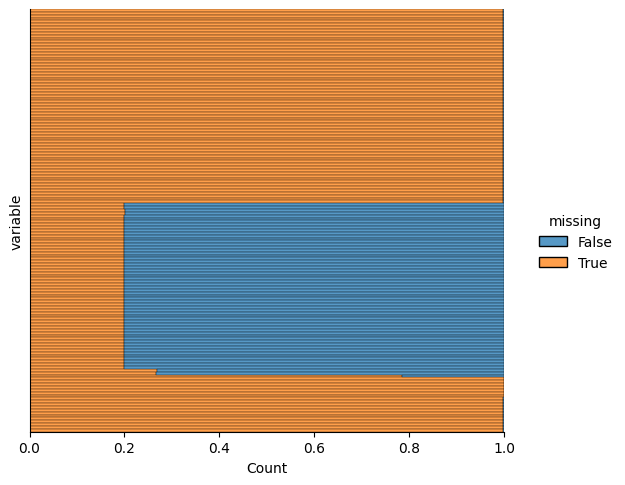

In [7]:
ax = sns.displot(data=fin_data.isna().melt(value_name="missing"),
                 y="variable",
                 hue="missing",
                 multiple="fill",
                 aspect=1.25)
plt.yticks([])

In [8]:
edata = pd.read_csv('../data/graph/edata.csv') # infromation about adges, why do we use several dataframes???

comp_comp = (edata['u'].str.startswith('company') &
             edata['v'].str.startswith('company'))
pers_pers = (edata['u'].str.startswith('person') &
             edata['v'].str.startswith('person'))    
pers_comp = ~(comp_comp | pers_pers)   

pd.Series({"company to company": comp_comp.sum(),
           "person to company": pers_comp.sum(),
           "person to person": pers_pers.sum()
          })

company to company     29150
person to company     155310
person to person           0
dtype: int64

In [9]:
edata

,u,v,type
0,company/6605435,man/2882955,management
1,man/2882955,company/6605435,management
2,company/7001607,company/2272401,parentage
3,company/2272401,company/7001607,parentage
4,company/7001607,company/9093898,parentage
...,...,...,...
184455,search?type=boss&val=ООО УК Аркада Сутюшева...,company/17706,management
184456,company/2730872,company/1195575,parentage
184457,company/1195575,company/2730872,parentage
184458,company/2730872,man/1318036,management
